# Segundo paso calcular distancias a perrete ideal

## Librerías

In [53]:
import warnings
warnings.filterwarnings('ignore')

### Básicas

In [54]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Sklearn y keras

In [55]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.models import Sequential
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder

## Datos y modelos

In [56]:
df_distrito = pd.read_csv('Datasets/info_distritos_madrid.csv')

df_razas = pd.read_csv('Datasets/razas-perretes.csv')

In [57]:
model_tam_svc = pickle.load(open('Models/modelo_svc_tam_final.pkl', 'rb'))
model_lon_svr = pickle.load(open('Models/modelo_rfr_lon_final.pkl', 'rb'))
model_int_rn = pickle.load(open('Models/modelo_rn_int_1.pkl', 'rb'))

scaler_X_tam = pickle.load(open('Models/scaler_X_tam.pkl', 'rb'))
scaler_X_lon = pickle.load(open('Models/scaler_X_lon.pkl', 'rb'))
scaler_X_int = pickle.load(open('Models/scaler_X_int.pkl', 'rb'))
scaler_y = pickle.load(open('Models/scaler_y_final.pkl', 'rb'))

# Inputs

In [58]:
['Renta media/pers (€)', 'Áreas caninas (m²)', 'tricks_yes','house_type_enc','owners_physical_activity_enc']

['Renta media/pers (€)',
 'Áreas caninas (m²)',
 'tricks_yes',
 'house_type_enc',
 'owners_physical_activity_enc']

## Distrito: Renta media persona y áreas caninas

In [59]:
df_preguntas = pd.DataFrame()

In [60]:
list_dist = list(df_distrito['Distrito'].unique())
list_dist

['Fuencarral-El Pardo',
 'Moncloa-Aravaca',
 'Latina',
 'Carabanchel',
 'Usera',
 'Villaverde',
 'Puente de Vallecas',
 'Villa de Vallecas',
 'Moratalaz',
 'Vicálvaro',
 'Ciudad Lineal',
 'San Blas-Canillejas',
 'Hortaleza',
 'Barajas',
 'Tetuán',
 'Chamartín',
 'Chamberí',
 'Centro',
 'Retiro',
 'Arganzuela',
 'Salamanca']

In [61]:
distrito =str()
dist_perm = list(map(lambda x: x.lower(), df_distrito['Distrito'].unique()))
print(dist_perm)
while distrito not in dist_perm:
  distrito = input('¿En qué distrito vives?')
  distrito = distrito.lower()

['fuencarral-el pardo', 'moncloa-aravaca', 'latina', 'carabanchel', 'usera', 'villaverde', 'puente de vallecas', 'villa de vallecas', 'moratalaz', 'vicálvaro', 'ciudad lineal', 'san blas-canillejas', 'hortaleza', 'barajas', 'tetuán', 'chamartín', 'chamberí', 'centro', 'retiro', 'arganzuela', 'salamanca']


In [62]:
df_preguntas.at[0,'Distrito'] = str(distrito)

In [63]:
df_distrito['Distrito'] = df_distrito['Distrito'].apply(lambda x: x.lower() if isinstance(x, str) else x)

In [64]:
df_preguntas = pd.merge(df_preguntas, df_distrito, on='Distrito', how='left')
df_preguntas = df_preguntas.drop(['Distrito', 'Renta media/hogar (€)', 'Perros censados', ' Ratio perros/m²'], axis=1)
df_preguntas

,Renta media/pers (€),Áreas caninas (m²)
0,23925,6736


## Tricks yes?


In [65]:
pos_tricks = ['yes', 'no']
tricks = str()
while tricks not in pos_tricks:
  tricks = input('¿Quiere un perro que haga trucos?')
  tricks = tricks.lower()

In [66]:
if tricks == 'yes':
  df_preguntas.at[0,'tricks_yes'] = 1
else:
  df_preguntas.at[0,'tricks_yes'] = 0

## Tipo de casa:

In [67]:
tipos_casa = ['apartamento pequeño', 'apartamento mediano', 'jardín amplio', 'finca']
house_type = str()
while house_type not in tipos_casa:
  house_type = input('¿En qué tipo de casa vives?')
  house_type = house_type.lower()

In [68]:
if house_type == 'apartamento pequeño':
  df_preguntas.at[0,'house_type_enc'] = 0
elif house_type == 'apartamento mediano':
  df_preguntas.at[0,'house_type_enc'] = 1
elif house_type == 'jardín amplio':
  df_preguntas.at[0,'house_type_enc'] = 2
else:
  df_preguntas.at[0,'house_type_enc'] = 3

df_preguntas

,Renta media/pers (€),Áreas caninas (m²),tricks_yes,house_type_enc
0,23925,6736,1.0,1.0


## Actividad física:

In [69]:
act_fisica = [0,1,2,3,4,5,6,7]
owners_physical_activity_enc = int()
while owners_physical_activity_enc not in act_fisica:
  owners_physical_activity_enc = input('¿Cuántos días a la semana haces ejercicio?')
  owners_physical_activity_enc = int(owners_physical_activity_enc)

In [70]:
df_preguntas.at[0, 'owners_physical_activity_enc'] = int(owners_physical_activity_enc/2)
df_preguntas

,Renta media/pers (€),Áreas caninas (m²),tricks_yes,house_type_enc,owners_physical_activity_enc
0,23925,6736,1.0,1.0,0.0


# Predicción Tamaño


In [71]:
orden_tam = ['Renta media/pers (€)', 'Áreas caninas (m²)', 'tricks_yes','house_type_enc','owners_physical_activity_enc']
df_preguntas

,Renta media/pers (€),Áreas caninas (m²),tricks_yes,house_type_enc,owners_physical_activity_enc
0,23925,6736,1.0,1.0,0.0


In [72]:
df_pred_tam = scaler_X_tam.transform(df_preguntas[orden_tam])
pred_tam = model_tam_svc.predict(df_pred_tam)
pred_tam

array([0.])

# Predicción de Longevity

In [73]:
orden_lon = ['size_category_enc', 'Renta media/pers (€)', 'Áreas caninas (m²)','house_type_enc','owners_physical_activity_enc']
df_preguntas.at[0, 'size_category_enc'] = pred_tam
df_preguntas

,Renta media/pers (€),Áreas caninas (m²),tricks_yes,house_type_enc,owners_physical_activity_enc,size_category_enc
0,23925,6736,1.0,1.0,0.0,0.0


Hay que ajustar el orden de las columnas si queremos la predicción bien:

In [74]:
df_pred_lon = scaler_X_lon.transform(df_preguntas[orden_lon])
pred_lon = model_lon_svr.predict(df_pred_lon)
pred_lon

array([11.22793822])

# Predicción Inteligencia

In [75]:
orden_int = ['size_category_enc', 'longevity', 'Renta media/pers (€)', 'Áreas caninas (m²)', 'tricks_yes','house_type_enc','owners_physical_activity_enc']
df_preguntas.at[0, 'longevity'] = pred_lon
df_preguntas

,Renta media/pers (€),Áreas caninas (m²),tricks_yes,house_type_enc,owners_physical_activity_enc,size_category_enc,longevity
0,23925,6736,1.0,1.0,0.0,0.0,11.227938


In [76]:
df_pred_int = scaler_X_int.transform(df_preguntas[orden_int])
pred_int = model_int_rn.predict(df_pred_int)
pred_int = np.argmax(pred_int, axis=1)
pred_int

1/1 [==============================] - 0s 77ms/step


array([2])

# Cálculo distancias

In [77]:
# Escalado de las predicciones:
df_preguntas.at[0, 'int_cat_enc_fixed'] = pred_int
df_preguntas[['size_cat_enc', 'lon_enc', 'int_cat_enc']] = scaler_y.transform(df_preguntas[['size_category_enc', 'longevity', 'int_cat_enc_fixed']])
df_preguntas

,Renta media/pers (€),Áreas caninas (m²),tricks_yes,house_type_enc,owners_physical_activity_enc,size_category_enc,longevity,int_cat_enc_fixed,size_cat_enc,lon_enc,int_cat_enc
0,23925,6736,1.0,1.0,0.0,0.0,11.227938,2.0,0.0,0.437927,1.0


In [78]:
# Haciendo el punto con el que comparar el df_razas
pto_tam = df_preguntas['size_cat_enc']
pto_lon = df_preguntas['lon_enc']
pto_int = df_preguntas['int_cat_enc']

punto_dado = np.array([pto_tam*3, pto_lon*2, pto_int])
punto_dado

array([[0.        ],
       [0.87585445],
       [1.        ]])

In [79]:
# Calcula la distancia euclidiana entre el punto dado y todos los puntos en el DataFrame
df_razas['size_cat_enc'] = df_razas['size_cat_enc']*3
df_razas['lon_enc'] = df_razas['lon_enc']*2

# Ajustando array para que no pete al comparar con df
punto_dado_broadcasted = punto_dado.reshape(1, -1)

# Calculando distancias en todo el df
df_razas['distancia'] = np.linalg.norm(df_razas[['size_cat_enc', 'lon_enc', 'int_cat_enc']].values - punto_dado_broadcasted, axis=1)

# Mostrando top 3 más compatibles:

In [80]:
sorted_df_razas = df_razas.sort_values(by='distancia', ascending=True)
sorted_df_razas['Compatibilidad (%)'] = 100-(sorted_df_razas['distancia']*100)/max(sorted_df_razas['distancia'])
sorted_df_razas[['Dog breed', 'Compatibilidad (%)']].round(2).head(3)

,Dog breed,Compatibilidad (%)
7,Miniature Schnauzer,97.00
27,Pembroke Welsh Corgi,94.73
3,Cocker Spaniel,93.44


<Figure size 2400x2000 with 0 Axes>

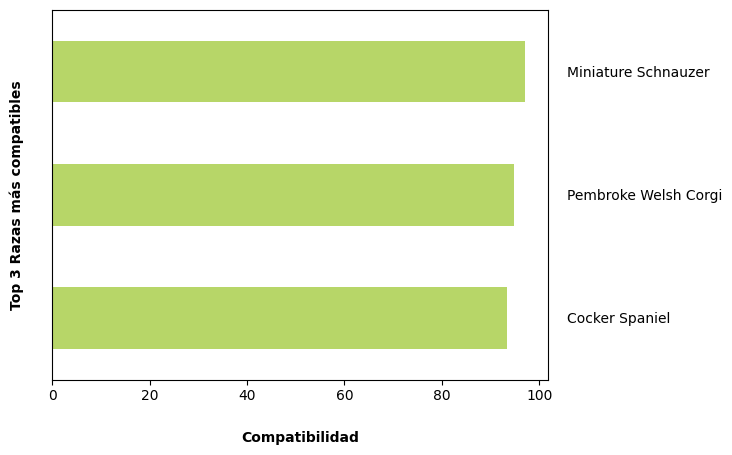

In [81]:
plt.figure(figsize=(24,20))
df_sorted = sorted_df_razas[['Dog breed', 'Compatibilidad (%)']].round(2).head(3)
df_sorted.sort_values(by='Compatibilidad (%)', ascending=True).plot(kind='barh', x='Dog breed', y='Compatibilidad (%)', color='#B7D668')
plt.legend().remove()
plt.xlabel(xlabel='Compatibilidad', fontweight='bold', labelpad=20)
plt.ylabel(ylabel='Top 3 Razas más compatibles', fontweight='bold', labelpad=20)
plt.tick_params(axis='y', which='major', labelleft=False, left=False, labelright=True, pad=10)  # Adjust pad value as needed
plt.show()